In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

import plotly.io as pio
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)
pio.templates.default = "none"

import warnings
warnings.filterwarnings('ignore')
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample_submission=pd.read_csv('sample_submission_.csv')

In [ ]:
display(train.shape)
display(test.shape)

(800, 22)

(200, 21)

In [ ]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [ ]:
display(train.isna().sum())
display(test.isna().sum())

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
dtype: int64

In [ ]:
train=train.rename(columns={'austim':'autism','contry_of_res':'country_of_res'})
test=test.rename(columns={'austim':'autism','contry_of_res':'country_of_res'})
# fixing the spelling mistakes#

In [ ]:
# fix the other/other capitalization
train['country_of_res'][train['country_of_res']=='others']='Others'
test['country_of_res'][test['country_of_res']=='others']='Others'

In [ ]:
train['ethnicity'][train['ethnicity']=='others']='Others'
test['ethnicity'][train['ethnicity']=='others']='Others'

In [ ]:
# drop un_important columns
train.drop(['ID','age_desc'],axis=1,inplace=True)
test.drop(['ID','age_desc'],axis=1,inplace=True)


In [ ]:

cat_cols=[col for col in train.columns if train[col].dtype=='object']
num_cols=[col for col in train.columns if train[col].dtype=='int'][0:-1]
ASD_pos=train[train['Class/ASD']==1]
ASD_neg=train[train['Class/ASD']==0]


In [ ]:
cat_cols

['gender',
 'ethnicity',
 'jaundice',
 'autism',
 'country_of_res',
 'used_app_before',
 'relation']

In [ ]:
num_cols

['A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score']

In [ ]:
#checking for categorical features uniqueness
for  col in cat_cols:
  x=train[col].nunique()
  y=train[col].nunique()
  print("{}: train : {} unique,test : {} unique".format(col,x,y))

gender: train : 2 unique,test : 2 unique
ethnicity: train : 11 unique,test : 11 unique
jaundice: train : 2 unique,test : 2 unique
autism: train : 2 unique,test : 2 unique
country_of_res: train : 61 unique,test : 61 unique
used_app_before: train : 2 unique,test : 2 unique
relation: train : 6 unique,test : 6 unique


In [ ]:
train['country_of_res'].unique()

array(['United States', 'Australia', 'United Kingdom', 'New Zealand',
       'Italy', 'Nicaragua', 'Canada', 'United Arab Emirates',
       'Netherlands', 'Sri Lanka', 'India', 'Armenia', 'Sierra Leone',
       'Argentina', 'Azerbaijan', 'Iceland', 'Egypt', 'Serbia',
       'Afghanistan', 'Costa Rica', 'Jordan', 'Angola', 'Pakistan',
       'Brazil', 'Ireland', 'Kazakhstan', 'Viet Nam', 'Ethiopia',
       'Austria', 'Finland', 'France', 'Malaysia', 'Japan', 'Spain',
       'Philippines', 'Iran', 'Czech Republic', 'Russia', 'Romania',
       'Mexico', 'Belgium', 'Aruba', 'Uruguay', 'Indonesia', 'Ukraine',
       'AmericanSamoa', 'Germany', 'China', 'Iraq', 'Tonga',
       'South Africa', 'Saudi Arabia', 'Hong Kong', 'Bahamas', 'Ecuador',
       'Cyprus', 'Bangladesh', 'Oman', 'Bolivia', 'Sweden', 'Niger'],
      dtype=object)

In [ ]:
label = ['ASD Positive (=1)', 'ASD Negative (=0)']
value = [ASD_pos.shape[0], ASD_neg.shape[0]] 
pct = [value[0]*100/len(train), value[1]*100/len(train)]


fig = go.Figure(data=[go.Bar(
            y=value, x=label,
            text=(np.round(pct,2)),
            textposition=['outside', 'inside'],
            texttemplate = ["<b style='color: #f'>%{text}%</b>"]*2,
            textfont=dict(  family="sans serif",
                            size=16,
                            color="black"),
            orientation='v',
            opacity=1.0,
                    )])
fig.update_layout(title='<b>Target: ASD Class <b>', 
                  font_family="San Serif",
                  template= 'simple_white',
                  yaxis_linewidth=2.5,
                  width=600, 
                  height=400,
                  bargap=0.2,
                  barmode='group',
                  titlefont={'size': 20},
                  )
fig.update_xaxes(showgrid=False, showline=True)
fig.update_yaxes(showgrid=False, showline=False, showticklabels=False, ticks='')
fig.show(renderer="colab")

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=ASD_pos['gender'],histnorm='percent',
              name='ASD_pos', marker_color = 'purple'),
              )
fig.add_trace(go.Histogram(x=ASD_neg['gender'],histnorm='percent',
              name='ASD_neg', marker_color = 'salmon', opacity=0.85),
             )  

fig.update_layout(title="Gender of the patient", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  template='simple_white',
                  width=600, 
                  height=400,
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.20, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending')
fig.show(renderer='colab')


In [ ]:
fig = px.histogram(train, x="ethnicity",
                   width=600, 
                   height=400,
                   histnorm='percent',
                   template="simple_white"
                   )

fig.update_layout(title="Ethnic group of the patient", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending') # ordering the x-axis values
#custom color
colors = ['lightgray',] * 15  
colors[1] = 'crimson' 
colors[0] = 'lightseagreen' 


fig.update_traces(marker_color=colors, 
                )
fig.show(renderer='colab')

fig = go.Figure()
fig.add_trace(go.Histogram(x=ASD_pos['ethnicity'],histnorm='percent',
              name='ASD_pos', marker_color = 'purple'),
              )
fig.add_trace(go.Histogram(x=ASD_neg['ethnicity'],histnorm='percent',
              name='ASD_neg', marker_color = 'salmon', opacity=0.85),
             )  

fig.update_layout(title="ASD analysis based in Enthnicity", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  template='simple_white',
                  width=600, 
                  height=400,
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending') 

fig.show(renderer='colab')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=ASD_pos['jaundice'],histnorm='',
              name='ASD_pos', marker_color = 'green'),
              )
fig.add_trace(go.Histogram(x=ASD_neg['jaundice'],histnorm='',
              name='ASD_neg', marker_color = 'purple', opacity=1.0),
             )  

fig.update_layout(title="Whether the patient had jaundice at the time of birth", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  template='simple_white',
                  width=600, 
                  height=400,
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending') 

fig.show(renderer='colab')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=ASD_pos['autism'],histnorm='',
              name='ASD_pos', marker_color = 'green'),
              )
fig.add_trace(go.Histogram(x=ASD_neg['autism'],histnorm='',
              name='ASD_neg', marker_color = 'purple', opacity=0.85),
             )  

fig.update_layout(title="Whether an immediate family member has been diagnosed with autism", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  template='simple_white',
                  width=600, 
                  height=400,
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending') 

fig.show(renderer='colab')


In [ ]:
fig = px.histogram(train, x="country_of_res", 
                   width=900, 
                   height=400,
                   histnorm='percent',
                   template="simple_white")
fig.update_layout(title="<b> Country of Residence of the patient <b>", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending') 

colors = ['lightgray',] * 120 
colors[0] = 'lightseagreen' 

fig.update_traces(marker_color=colors, 
                 ).update_xaxes(categoryorder='total descending')
                   
fig.show(renderer='colab')


In [ ]:
fig = px.treemap(train, path=['country_of_res','Class/ASD'], color='Class/ASD',
                 color_continuous_scale='teal',               
)

fig.update_layout(#title="<b> Country of Residence of the patient<b>",
                  titlefont={'size': 20, 'family': "San Serif"},
                  height=500, width=1000,
                  template='simple_white',
                  autosize=False,
                  margin=dict(l=50,r=50,b=50, t=250,
                             ),
                 )
fig.update_layout(margin = dict(t=50, l=50, r=50, b=100))
fig.show(renderer='colab')


In [ ]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=ASD_pos['used_app_before'],histnorm='',
              name='ASD_pos', marker_color = 'purple'),
              )
fig.add_trace(go.Histogram(x=ASD_neg['used_app_before'],histnorm='',
              name='ASD_neg', marker_color = 'salmon', opacity=0.85),
             )    
fig.update_layout(barmode='group')
fig.update_layout(title="Whether the patient has undergone a screening test before", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  template='simple_white',
                  width=600, 
                  height=400,
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending') 

fig.show(renderer='colab')


In [ ]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=ASD_pos['relation'],histnorm='',
              name='ASD_pos', marker_color = 'purple'),
              )
fig.add_trace(go.Histogram(x=ASD_neg['relation'],histnorm='',
              name='ASD_neg', marker_color = 'salmon', opacity=0.85),
             )    
fig.update_layout(barmode='group')
fig.update_layout(title="Relation of patient who completed the test", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  template='simple_white',
                  width=600, 
                  height=400,
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending') 

fig.show(renderer='colab')


In [ ]:
group_labels = ['ASD_pos', 'ASD_neg']
fig = ff.create_distplot([ASD_pos['age'], ASD_neg['age']],
                         group_labels, 
                         show_hist=True, 
                         show_rug=True,
                         colors=['purple', 'salmon'],
                         )
fig.update_layout(title='<b>Age distribution<b>',
                  xaxis_title='Age',
                  yaxis_title='density',
                  titlefont={'size': 20},
                  font_family = 'San Serif',
                  width=700,height=500,
                  template="simple_white",
                  showlegend=True,
                  legend=dict(
                      orientation="v",
                      y=1, 
                      yanchor="top", 
                      x=1.0, 
                      xanchor="right",
                  )
                 )
fig.add_vrect(
    x0=9, x1=35,
    annotation_text="Young patients", annotation_position="top",
    fillcolor="lightgray", opacity=0.5,
    layer="below", line_width=0,
),
fig.show(renderer='colab')


In [ ]:
fig = make_subplots(rows=5, cols=2,
                   subplot_titles=('A1_Score','A6_Score', 'A2_Score', 'A7_Score','A3_Score', 
                                   'A8_Score','A4_Score','A9_Score', 'A5_Score','A10_Score',
                                   ))     

for i, feat in enumerate(num_cols[0:5]):
    fig.add_trace(go.Histogram(x=ASD_pos[feat],histnorm='percent',
                  name='ASD_pos', marker_color = 'purple'),
                  row=i+1, col=1)
    fig.add_trace(go.Histogram(x=ASD_neg[feat],histnorm='percent',
                  name='ASD_neg', marker_color = 'salmon', opacity=0.85),

                 row=i+1, col=1)    
    fig.update_layout(barmode='overlay')
                           
for j, feat in enumerate(num_cols[5:12]):
    fig.add_trace(go.Histogram(x=ASD_pos[feat],histnorm='percent',
                  name='ASD_pos', marker_color = 'purple'),
                 row=j+1, col=2)
    fig.add_trace(go.Histogram(x=ASD_neg[feat],histnorm='percent',
                  name='ASD_neg', marker_color = 'salmon', opacity=0.85),
                 row=j+1, col=2)    
    fig.update_layout(barmode='overlay')

fig.update_layout(title=" <b> Screening test score (A1- A10) <b>",
                      font_family="San Serif",
                      titlefont={'size': 24},
                      width=900, height=1200,
                      template='simple_white',
                      showlegend=False,
                      bargap=0.1, 
                      bargroupgap=0.1
                     )

fig.update_layout(barmode='group')
fig.show(renderer='colab')



In [ ]:
ASD_pos_result = train[train['Class/ASD'] == 1]['result']
ASD_neg_result = train[train['Class/ASD'] == 0]['result']

fig = go.Figure()
fig.add_trace(go.Violin(x=ASD_pos_result, line_color='lightseagreen', name='ASD_positive', y0=0))
fig.add_trace(go.Violin(x=ASD_neg_result, line_color='red', name= 'ASD_negative', y0=0))

fig.update_traces(orientation='h', side='positive', meanline_visible=True)
fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False)

fig.update_layout(title='<b> Screening test result distribution (QA1-10) <b>',
                  font_family="San Serif",
                  xaxis_title='Result',
                  titlefont={'size': 20},
                  width=600,
                  height=400,
                  template="simple_white",
                  showlegend=True,
                  )
fig.update_yaxes(showgrid=False, showline=False, showticklabels=False)
fig.show(renderer='colab')


#Higher QA test score means higher chances of being ASD_positive

In [ ]:
def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


def plot_carmersV_corr(df):
    rows= []
    for x in df:
        col = []
        for y in df :
            cramers =cramers_v(df[x], df[y])
            col.append(round(cramers,2))
        rows.append(col)

    cramers_results = np.array(rows)
    df_corr = pd.DataFrame(cramers_results, columns = df.columns, index = df.columns)

    mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
    df_corr = df_corr.mask(mask)


    fig = go.Figure(data= go.Heatmap(z=df_corr,
                                     x=df_corr.index.values,
                                     y=df_corr.columns.values,
                                     colorscale='purples',                                  
                                     )
                    )
    fig.update_layout(title_text='<b>Correlation Heatmap (Categorical features) <b>',
                      font_family="San Serif",
                      title_x=0.5,
                      titlefont={'size': 20},
                      width=700, height=700,
                      xaxis_showgrid=False,
                      xaxis={'side': 'bottom'},
                      yaxis_showgrid=False,
                      yaxis_autorange='reversed',                   
                                        autosize=False,
                      margin=dict(l=150,r=50,b=150,t=70,pad=0),
                      )
    fig.show(renderer='colab')
        
plot_carmersV_corr(train.drop(['age', 'result'], axis=1))
# heat map for categorical features     

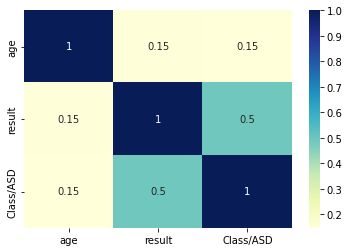

In [ ]:
import seaborn as sns
import matplotlib.pyplot as mp
# plotting correlation heatmap
data= train[['age','result','Class/ASD']]
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

In [ ]:
from scipy.stats import uniform

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier


from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


from sklearn.model_selection import cross_validate, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score 
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
train_le = train.copy()
test_le = test.copy()

for col in cat_cols:
        train_le[col] = label_encoder.fit_transform(train[col])
        test_le[col] = label_encoder.fit_transform(test[col]) 
        
train = train_le
test = test_le

In [ ]:
FEATURES = train.columns[0:-1]
TARGET = train.columns[-1]

X = train.loc[:, FEATURES]
y = train.loc[:, TARGET]

seed = 0
fold = 5

In [ ]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_validate

def score(X, y, model, cv):
    scoring = ["roc_auc"]
    scores = cross_validate(
        model, X, y, scoring=scoring, cv=cv, return_train_score=True,
    )
    scores = pd.DataFrame(scores).T
    return scores.assign(
        mean = lambda x: x.mean(axis=1),
        std = lambda x: x.std(axis=1),
    )

skf = StratifiedKFold(n_splits=fold, shuffle=True, random_state=seed)

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(solver='saga', 
                              tol=1e-5, max_iter=10000,
                              random_state=0,
                              C=0.22685190926977272,
                              penalty='l2',
                             )

scores = score(X, y, model_lr, cv=skf)
display(scores)

,0,1,2,3,4,mean,std
fit_time,3.431597,3.022075,2.471823,1.413953,1.526101,2.373109,0.798586
score_time,0.004498,0.004818,0.003239,0.003171,0.003194,0.003784,0.000721
test_roc_auc,0.919798,0.863107,0.900022,0.954296,0.939134,0.915271,0.031832
train_roc_auc,0.924165,0.935825,0.928120,0.915403,0.916392,0.923981,0.007597


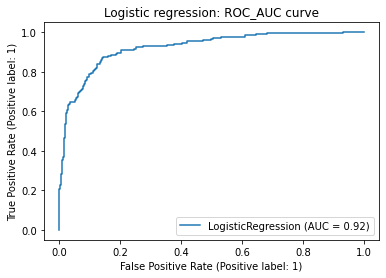

In [ ]:
import sklearn.metrics as metrics
model_lr.fit(X, y)
metrics.plot_roc_curve(model_lr, X, y)
plt.title('Logistic regression: ROC_AUC curve')
plt.show();


In [ ]:
y_pred_lr = pd.Series(
    model_lr.predict_proba(test)[:, 1],
    index=test.index,
    name=TARGET,
)
sub = pd.DataFrame({'ID': sample_submission.ID, 'Class/ASD': y_pred_lr})
sub.to_csv("submission_lr.csv", index=False)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model_etc = ExtraTreesClassifier(
    n_estimators=1000,
    max_depth=2,
    random_state=0,
)
scores = score(X, y, model_etc, cv=skf)
display(scores)

,0,1,2,3,4,mean,std
fit_time,1.039695,1.047641,1.016622,1.003500,1.019231,1.025338,0.016085
score_time,0.121685,0.150858,0.114798,0.112604,0.116765,0.123342,0.014082
test_roc_auc,0.907273,0.875192,0.892112,0.946825,0.959350,0.916150,0.032067
train_roc_auc,0.923094,0.932831,0.926211,0.912959,0.911482,0.921315,0.008078


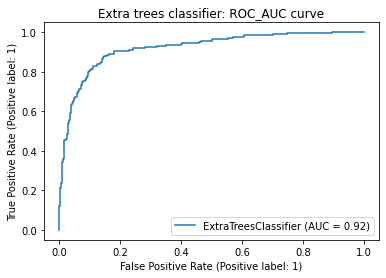

In [ ]:
model_etc.fit(X, y)
metrics.plot_roc_curve(model_etc, X, y)
plt.title('Extra trees classifier: ROC_AUC curve')
plt.show();

In [ ]:
y_pred_etc = pd.Series(
    model_etc.predict_proba(test)[:, 1],
    index=test.index,
    name=TARGET,
)

sub = pd.DataFrame({'ID': sample_submission.ID, 'Class/ASD': y_pred_etc})
sub.to_csv("submission_etc.csv", index=False)

In [ ]:
sub1 = pd.DataFrame({'ID': sample_submission.ID, 'Class/ASD':(0.35* y_pred_etc + 0.65* y_pred_lr)})
sub1.to_csv("submission_etc35_lr65.csv", index=False)

sub2 = pd.DataFrame({'ID': sample_submission.ID, 'Class/ASD': (0.5* y_pred_etc + 0.5* y_pred_lr)})
sub2.to_csv("submission_etc5_lr5.csv", index=False)

sub3 = pd.DataFrame({'ID': sample_submission.ID, 'Class/ASD': (0.4* y_pred_etc + 0.6* y_pred_lr)})
sub3.to_csv("submission_etc4_lr6.csv", index=False)

In [ ]:
sub1

,ID,Class/ASD
0,1,0.022302
1,2,0.051402
2,3,0.105392
3,4,0.519307
4,5,0.215528
...,...,...
195,196,0.044785
196,197,0.431951
197,198,0.381084
198,199,0.797006


In [ ]:
sub2

,ID,Class/ASD
0,1,0.028181
1,2,0.058080
2,3,0.134821
3,4,0.494298
4,5,0.223990
...,...,...
195,196,0.050597
196,197,0.423317
197,198,0.385214
198,199,0.767495


In [ ]:
sub3

,ID,Class/ASD
0,1,0.024261
1,2,0.053628
2,3,0.115202
3,4,0.510971
4,5,0.218348
...,...,...
195,196,0.046722
196,197,0.429073
197,198,0.382460
198,199,0.787169
